# About This Project

#### We'll be reviewing information about internet costs around the world, the quality of internet connections trough different countries and regions and the number of internet users in each country. The purpose of this project is to have an idea of how easy or dificcult it is to have access to a stable, high speed internet conection in any place of the world, now that some of us may be planning to become digital citizens of the world.

#### The data set used for this project was extracted from Kaggle.com: https://www.kaggle.com/datasets/ramjasmaurya/1-gb-internet-price 

#### The idea of this is to have an insightful source of information for those interested in this matter, so new ideas and comments to improve it are welcome. 

#### You can access the dashboard here: https://datastudio.google.com/reporting/0a6f230e-ec9e-4581-976a-b1a015500992/page/3zYxC/edit

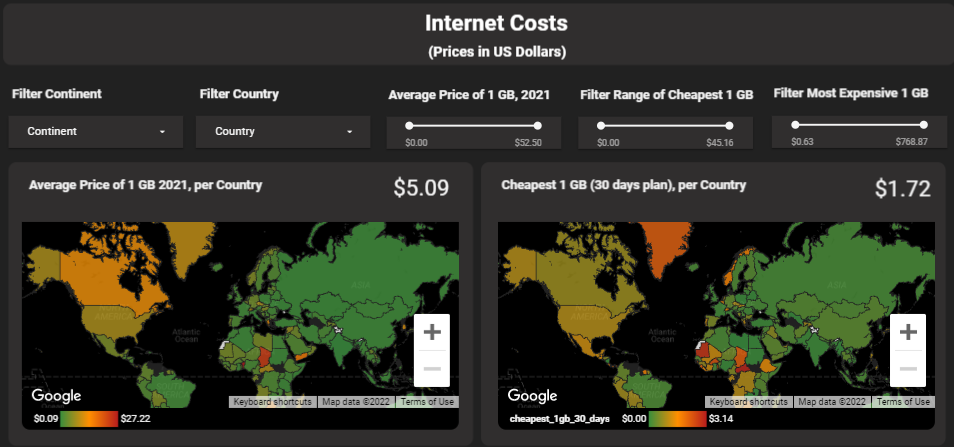

In [1]:
# Let's import the project's cover image
from PIL import Image
image = Image.open("/work/front_internet_worlwide.png")
image.show()

# Set Up

In [2]:
# Import requried libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import time
from datetime import datetime
!pip install gspread
!pip install gspread_dataframe
from gspread_dataframe import set_with_dataframe
import gspread
gc = gspread.service_account(filename='/work/world-wide-web-356017-564c77672260.json')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Extract

In [3]:
# extract first df and create variable "prices". 
# list of default na values is redefined to exclude string 'NA' which happens to be Namibia's country code
prices = pd.read_csv('/work/cerebro/worldwide internet prices in 2022 - IN 2022.csv',keep_default_na=False, na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', ''])

In [4]:
# extract second df and create variable "speed"
speed = pd.read_csv('/work/cerebro/worldwide internet speed in 2022  - avg speed.csv')

In [5]:
# extract third df and create variable "users"
users = pd.read_csv('/work/cerebro/worldwide internet users - users.csv')

# Transform

## Prices

In [6]:
# This is our first DF
prices

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68
...,...,...,...,...,...,...,...,...,...
237,VA,Vatican City (Holy See),Europe,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
238,VE,Venezuela,SOUTH AMERICA,NaN,HYPERINFLATION,NaN,NaN,NaN,NaN
239,WF,Wallis and Futuna,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
240,CD,Congo (Democratic Republic of),SUB-SAHARAN AFRICA,NaN,Prices listed in non-convertible 'units',NaN,NaN,NaN,NaN


In [7]:
# Checking prices columns, null values and data types
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      242 non-null    object 
 1   Name                                              242 non-null    object 
 2   Continental region                                242 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        242 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

#### DF has some few null values in 5 of the columns. Let's explore them.

In [8]:
prices.loc[prices['NO. OF Internet Plans '].isnull(),]

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
230,CW,Christmas Island,CARIBBEAN,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
231,ER,Eritrea,NORTHERN AFRICA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
232,KP,North Korea,CARIBBEAN,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
233,MH,Marshall Islands,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
234,PM,St. Pierre and Miquelon,CARIBBEAN,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
235,SS,South Sudan,SUB-SAHARAN AFRICA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
236,TT,Tuvalu,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
237,VA,Vatican City (Holy See),Europe,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
238,VE,Venezuela,SOUTH AMERICA,NaN,HYPERINFLATION,NaN,NaN,NaN,NaN
239,WF,Wallis and Futuna,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN


#### Indeed, this DF has basically no info from index 230 to 241, besides the country/region reference. We can drop this rows and we won't miss any valuable information.  

In [9]:
# drop rows with null values for selected columns only
prices.dropna(subset=['NO. OF Internet Plans ','Average price of 1GB (USD)','Cheapest 1GB for 30 days (USD)',
    'Most expensive 1GB (USD)','Average price of 1GB (USD  at the start of 2021)',
    'Average price of 1GB (USD – at start of 2020)'],inplace=True)

#### Let's now check our DF in more detail, without null values

In [10]:
prices

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68
...,...,...,...,...,...,...,...,...,...
225,MW,Malawi,SUB-SAHARAN AFRICA,5.0,$25.46,$20.37,$25.46,$27.41,$3.59
226,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16.0,$30.97,$13.27,$121.65,$28.26,$5.33
227,SH,Saint Helena,SUB-SAHARAN AFRICA,4.0,$39.87,$38.57,$51.42,$52.50,$6.04
228,FK,Falkland Islands,SOUTH AMERICA,4.0,$44.56,$29.71,$82.26,$40.41,$55.47


#### Last five columns represent different types of internet costs for every country. We should convert those columns to integers and delete the $ sign for a better manipulation. 

In [11]:
# First, let's apply a function to delete the $ sign 
cols = ['Average price of 1GB (USD)', 'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (USD)','Average price of 1GB (USD  at the start of 2021)','Average price of 1GB (USD – at start of 2020)']
prices[cols] = prices[cols].apply(lambda x: x.str.lstrip('$'))

# now let's convert these columns to numeric
prices[cols] = prices[cols].apply(pd.to_numeric, errors= 'coerce')

# Finally, column names are a bit messy, we could improve them
prices.rename({'NO. OF Internet Plans ':'num_internet_plans','Average price of 1GB (USD)': 'avg_price_1gb','Cheapest 1GB for 30 days (USD)':'cheapest_1gb_30_days',
            'Most expensive 1GB (USD)':'most_expensive_1gb','Average price of 1GB (USD  at the start of 2021)':'avg_price_1gb_2021','Average price of 1GB (USD – at start of 2020)':'avg_price_1gb_2020'}, axis=1, inplace=True)

#### This should look better now.

In [12]:
prices.head()

,Country code,Name,Continental region,num_internet_plans,avg_price_1gb,cheapest_1gb_30_days,most_expensive_1gb,avg_price_1gb_2021,avg_price_1gb_2020
0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27
2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57
3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68


#### Once done with the numeric columns, let's check the ones containing text

In [13]:
# As a good practice, let's get rid of whitespaces at the begining and end in all three columns
cols = ['Country code', 'Name', 'Continental region']
prices[cols] = prices[cols].apply(lambda x: x.str.strip())

# We can also improve the column names
prices.rename({'Country code':'country_code','Name': 'name','Continental region':'continental_region'}, axis=1, inplace=True)

#### Finally, let's check the "continental_region" column, it seems like with some transformations it can be insightful. 

In [14]:
prices['continental_region'].value_counts()

SUB-SAHARAN AFRICA      47
WESTERN EUROPE          30
CARIBBEAN               28
ASIA (EX. NEAR EAST)    28
OCEANIA                 22
NEAR EAST               15
EASTERN EUROPE          14
SOUTH AMERICA           13
CIS (FORMER USSR)       11
CENTRAL AMERICA          8
NORTHERN AFRICA          7
NORTHERN AMERICA         4
BALTICS                  3
Name: continental_region, dtype: int64

#### Quite a few regions. Let's make it just 5: Asia, Americas, Europe, Africa and Oceania. It'll be usefull when visualizing this data in a map, to filter by region.

In [15]:
# Reduce continental_region column to 5 regions
conditions = [ (prices['continental_region'].isin(('SOUTH AMERICA', 'CENTRAL AMERICA','NORTHERN AMERICA','CARIBBEAN'))),
                (prices['continental_region'].isin(('WESTERN EUROPE', 'EASTERN EUROPE', 'BALTICS'))),
                (prices['continental_region'].isin(('SUB-SAHARAN AFRICA', 'NORTHERN AFRICA'))),
                (prices['continental_region'].isin(('ASIA (EX. NEAR EAST)', 'NEAR EAST','CIS (FORMER USSR)'))),
                (prices['continental_region'].str.contains(('OCEANIA'))) ]
regions = ['Americas', 'Europe', 'Africa','Asia','Oceania']
prices["continental_region"] = np.select(conditions, regions, default=np.nan)

In [16]:
# There seems to be a problem with a few european countries that figure as Asian. Let's correct this. 
prices.loc[prices['name'] == 'Belarus','continental_region'] = 'Europe'
prices.loc[prices['name'] == 'Ukraine','continental_region'] = 'Europe'
prices.loc[prices['name'] == 'Cyprus','continental_region'] = 'Europe'

In [17]:
prices['continental_region'].value_counts()

Africa      54
Americas    53
Asia        51
Europe      50
Oceania     22
Name: continental_region, dtype: int64

#### It looks like we have a cleaner data set now. Let's now check the distributions and do some more data cleaning using basic statistics.

In [18]:
prices.describe()

,num_internet_plans,avg_price_1gb,cheapest_1gb_30_days,most_expensive_1gb,avg_price_1gb_2021,avg_price_1gb_2020
count,230.000000,230.000000,230.000000,230.000000,228.000000,227.000000
mean,26.730435,4.072957,1.722652,29.730348,5.091535,8.176960
std,16.468216,6.443007,4.774479,59.329737,6.653537,8.873163
min,1.000000,0.050000,0.000000,0.630000,0.090000,0.260000
25%,15.000000,1.082500,0.212500,5.902500,1.385000,2.850000
50%,22.000000,2.205000,0.630000,12.525000,3.240000,5.250000
75%,36.000000,4.357500,1.390000,34.295000,5.332500,11.035000
max,60.000000,49.670000,45.160000,768.870000,52.500000,65.830000


#### It seems we have rightly skewed distributions for all our variables as the mean is considerably higher than the median in all of them. Let's see this in more detail and prepare to clean outliers if necessary.

In [19]:
fig = px.histogram(prices, x='avg_price_1gb', title='Distribution_avg_price_1gb', marginal='box')
fig.show()

In [20]:
# Let's determine outliers for this distribution using a common formula to set minimum and maximum values: min_limit = q1 - 1.5*iqr and max_limit = q3 + 1.5*iqr
q1 = prices['avg_price_1gb'].quantile(0.25)
q3 = prices['avg_price_1gb'].quantile(0.75)
print('Quantile 1: ' + str(q1) + ', '+ 'Quantile 3: ' +  str(q3))

# Inter quantile range, IQR
iqr = q3 - q1
print('Inter Quantile Range: ' + str(iqr))

# defining limits for outliers
min_limit_col1 = q1 - 1.5*iqr
max_limit_col1 = q3 + 1.5*iqr
print('Min limit: ' + str(min_limit_col1) + ', ' + 'Max limit: ' + str(max_limit_col1))

Quantile 1: 1.0825, Quantile 3: 4.3575
Inter Quantile Range: 3.275
Min limit: -3.8299999999999996, Max limit: 9.27


In [21]:
fig = px.histogram(prices, x='cheapest_1gb_30_days', title='Distribution_cheapest_1gb_30_days', marginal='box')
fig.show()

In [22]:
# Let's determine outliers for this distribution using a common formula to set minimum and maximum values: min_limit = q1 - 1.5*iqr and max_limit = q3 + 1.5*iqr
q1 = prices['cheapest_1gb_30_days'].quantile(0.25)
q3 = prices['cheapest_1gb_30_days'].quantile(0.75)
print('Quantile 1: ' + str(q1) + ', '+ 'Quantile 3: ' +  str(q3))

# Inter quantile range, IQR
iqr = q3 - q1
print('Inter Quantile Range: ' + str(iqr))

# defining limits for outliers
min_limit_col2 = q1 - 1.5*iqr
max_limit_col2 = q3 + 1.5*iqr
print('Min limit: ' + str(min_limit_col2) + ', ' + 'Max limit: ' + str(max_limit_col2))

Quantile 1: 0.2125, Quantile 3: 1.39
Inter Quantile Range: 1.1775
Min limit: -1.55375, Max limit: 3.15625


In [23]:
fig = px.histogram(prices, x='most_expensive_1gb', title='Distribution_most_expensive_1gb', marginal='box')
fig.show() 

In [24]:
# Let's determine outliers for this distribution using a common formula to set minimum and maximum values: min_limit = q1 - 1.5*iqr and max_limit = q3 + 1.5*iqr
q1 = prices['most_expensive_1gb'].quantile(0.25)
q3 = prices['most_expensive_1gb'].quantile(0.75)
print('Quantile 1: ' + str(q1) + ', '+ 'Quantile 3: ' +  str(q3))

# Inter quantile range, IQR
iqr = q3 - q1
print('Inter Quantile Range: ' + str(iqr))

# defining limits for outliers
min_limit_col3 = q1 - 1.5*iqr
max_limit_col3 = q3 + 1.5*iqr
print('Min limit: ' + str(min_limit_col3) + ', ' + 'Max limit: ' + str(max_limit_col3))

Quantile 1: 5.9025, Quantile 3: 34.295
Inter Quantile Range: 28.392500000000002
Min limit: -36.68625, Max limit: 76.88375


In [25]:
fig = px.histogram(prices, x='avg_price_1gb_2021', title='Distribution_avg_price_1gb_2021', marginal='box')
fig.show() 

In [26]:
# Let's determine outliers for this distribution using a common formula to set minimum and maximum values: min_limit = q1 - 1.5*iqr and max_limit = q3 + 1.5*iqr
q1 = prices['avg_price_1gb_2021'].quantile(0.25)
q3 = prices['avg_price_1gb_2021'].quantile(0.75)
print('Quantile 1: ' + str(q1) + ', '+ 'Quantile 3: ' +  str(q3))

# Inter quantile range, IQR
iqr = q3 - q1
print('Inter Quantile Range: ' + str(iqr))

# defining limits for outliers
min_limit_col4 = q1 - 1.5*iqr
max_limit_col4 = q3 + 1.5*iqr
print('Min limit: ' + str(min_limit_col4) + ', ' + 'Max limit: ' + str(max_limit_col4))

Quantile 1: 1.385, Quantile 3: 5.3325000000000005
Inter Quantile Range: 3.9475000000000007
Min limit: -4.536250000000001, Max limit: 11.25375


In [27]:
fig = px.histogram(prices, x='avg_price_1gb_2020', title='Distribution_avg_price_1gb_2020', marginal='box')
fig.show()

In [28]:
# Let's determine outliers for this distribution using a common formula to set minimum and maximum values: min_limit = q1 - 1.5*iqr and max_limit = q3 + 1.5*iqr
q1 = prices['avg_price_1gb_2020'].quantile(0.25)
q3 = prices['avg_price_1gb_2020'].quantile(0.75)
print('Quantile 1: ' + str(q1) + ', '+ 'Quantile 3: ' +  str(q3))

# Inter quantile range, IQR
iqr = q3 - q1
print('Inter Quantile Range: ' + str(iqr))

# defining limits for outliers
min_limit_col5 = q1 - 1.5*iqr
max_limit_col5 = q3 + 1.5*iqr
print('Min limit: ' + str(min_limit_col5) + ', ' + 'Max limit: ' + str(max_limit_col5))

Quantile 1: 2.85, Quantile 3: 11.035
Inter Quantile Range: 8.185
Min limit: -9.4275, Max limit: 23.3125


#### Now we have the values we need to filter each variable. The best way to display this could be using maps in google data studio.

#### To check difference between 2020 and 2021, let's create a column calculating this in % terms.

In [29]:
# create column with % variation between 2020 and 2021. We can build a function for that
def percentage_change(col1,col2):
    return ((col2 - col1) / col1)

prices['%_change_2020_2021'] = round(percentage_change(prices['avg_price_1gb_2020'],prices['avg_price_1gb_2021']),4)

## Speed

In [30]:
# Let's inspect our data frame
speed

,Country,Avg \n(Mbit/s)Ookla
0,Canada,75.18
1,South Korea,117.95
2,Netherlands,108.33
3,Japan,44.05
4,Norway,134.73
...,...,...
139,Sudan,9.50
140,Cuba,9.10
141,Tajikistan,7.05
142,Venezuela,5.68


In [31]:
# Checking null values and data types
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             144 non-null    object 
 1   Avg 
(Mbit/s)Ookla  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


#### Only 144 countries, considerably less if we compare ir to our previous data frame that contains 230.

#### There is a rare problem with the second column, it has a new line character that splits the column name along two different rows. 

In [32]:
speed.columns

Index(['Country', 'Avg \n(Mbit/s)Ookla'], dtype='object')

In [33]:
# Renaming the column
speed.rename({'Avg \n(Mbit/s)Ookla':'avg_speed_mbit/s'}, axis=1, inplace=True)

In [34]:
speed.columns

Index(['Country', 'avg_speed_mbit/s'], dtype='object')

In [35]:
# Let's see the only null value the second column has
speed.loc[speed['avg_speed_mbit/s'].isnull(),] 

,Country,avg_speed_mbit/s
47,Puerto Rico,NaN


#### Just two columns, very few null values. This should be quick.

In [36]:
# Sorry Puerto Rico, but you need to go
# drop rows with null values for selected columns only
speed.dropna(subset=['avg_speed_mbit/s'],inplace=True)

In [37]:
# No null values in our data set
speed.isna().sum()

Country             0
avg_speed_mbit/s    0
dtype: int64

In [38]:
# The speed value doesn't need to be with decimals
speed['avg_speed_mbit/s'] = round(speed['avg_speed_mbit/s'],0)

In [39]:
# Finally, as a good practice, let's get rid of whitespaces at the begining and end
speed['Country'] = speed['Country'].str.strip()

#### We can create a new column that categorizes the internet speed as high, medium and low. It'll be usefull as a filter.

In [40]:
# Setting up speed categories:
conditions = [
        (speed['avg_speed_mbit/s'] <= 20),
        (speed['avg_speed_mbit/s'] > 20) & (speed['avg_speed_mbit/s'] <= 40),
        (speed['avg_speed_mbit/s'] > 40)
]
values = ['low_speed (20 or less)','medium_speed (20 to 40)','high_speed (over 40)']

speed['speed_category'] = np.select(conditions, values)

In [41]:
speed['speed_category'].value_counts()

low_speed (20 or less)     54
high_speed (over 40)       47
medium_speed (20 to 40)    42
Name: speed_category, dtype: int64

#### That's it with this one, ready to export!

## Users

#### Let's inspect our data frame.

In [42]:
users

,Country or area,Subregion,Region,Internet users,Population
0,China,Eastern Asia,Asia,"1,010,740,000","1,427,647,786"
1,India,Southern Asia,Asia,"833,710,000","1,352,642,280"
2,United States,Northern America,Americas,"312,320,000","327,096,265"
3,Indonesia,South-eastern Asia,Asia,"196,000,000","267,670,543"
4,Brazil,South America,Americas,"160,010,801","209,469,323"
...,...,...,...,...,...
209,"Saint Helena, Ascension and Tristan da Cunha",Western Africa,Africa,"2,906","6,035"
210,Falkland Islands,South America,Americas,"2,881","3,234"
211,Montserrat,Caribbean,Americas,"2,833","4,993"
212,Wallis and Futuna,Polynesia,Oceania,"1,383","11,661"


In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or area  214 non-null    object
 1   Subregion        214 non-null    object
 2   Region           214 non-null    object
 3   Internet users   214 non-null    object
 4   Population       212 non-null    object
dtypes: object(5)
memory usage: 8.5+ KB


#### Five columns, very few null values, let's do some cleaning starting with numeric columns.

In [44]:
# Let's now convert numeric columns to numeric type, after doing a little trick we need to be able to do the convertion: delete the commas
users['Population'] =  pd.to_numeric(users['Population'].str.replace(',',''),errors='coerce')
users['Internet users'] =  pd.to_numeric(users['Internet users'].str.replace(',',''),errors='coerce')

#### Let's now check those null values in the last column

In [45]:
# Checking null values for the only column that has any.
users.loc[users['Population'].isnull(),]

,Country or area,Subregion,Region,Internet users,Population
98,Palestine,Western Asia,Asia,3208312,NaN
197,Jersey,Northern Europe,Europe,38958,NaN


#### Just 2 countries, but they have info about number of internet users on another column, which is useful. We could fill these fileds just looking up the data on wikipedia.  

#### After a quick search, we found that Jersey has 99,000 inhabitants and Palestine 4.803.000. Let's complete our data frame.

In [46]:
# Filling the missing values in our DF
users.loc[[98,197],'Population' ] = 4803000, 99000

In [47]:
users.loc[(users['Country or area'] == 'Palestine') | (users['Country or area'] == 'Jersey'),]

,Country or area,Subregion,Region,Internet users,Population
98,Palestine,Western Asia,Asia,3208312,4803000.0
197,Jersey,Northern Europe,Europe,38958,99000.0


#### This is better. Let's now check the rest of the columns

In [48]:
# As a good practice, let's get rid of whitespaces at the begining and end in all three columns
cols = ['Country or area', 'Subregion', 'Region']
users[cols] = users[cols].apply(lambda x: x.str.strip())

# We can also improve the column names 
users.rename({'Country or area':'country','Region': 'continent','Internet users':'internet_users','Population':'population'}, axis=1, inplace=True)

# We could drop the 'Subregion' column as we won't be using it, just the continent information
users.drop(['Subregion'],axis=1, inplace=True)

#### Finally, we can calculate the percenatge of the population that are internet users.

In [49]:
users['%_internet_users_vs_pop'] = users['internet_users'] / users['population']

#### That's it for this one.

In [50]:
users.head()

,country,continent,internet_users,population,%_internet_users_vs_pop
0,China,Asia,1010740000,1.427648e+09,0.707976
1,India,Asia,833710000,1.352642e+09,0.616357
2,United States,Americas,312320000,3.270963e+08,0.954826
3,Indonesia,Asia,196000000,2.676705e+08,0.732243
4,Brazil,Americas,160010801,2.094693e+08,0.763887


#### Let's now load our data to google sheets since where we'll feed the google data studio dashboard.

#### You can access the dashboard here: https://datastudio.google.com/reporting/0a6f230e-ec9e-4581-976a-b1a015500992/page/3zYxC/edit

# Load

In [51]:
#load data to google sheets
#Create key
key = "1ta2iOwjKzIRu7CL60DqzXpVlYhvaTOz7618GmgF8Kts"

#Selects the sheet to export to
sheet = gc.open_by_key(key).worksheet('prices')
sheet1 = gc.open_by_key(key).worksheet('speed')
sheet2 = gc.open_by_key(key).worksheet('users')

#Clears the sheet and exports data
sheet.batch_clear(["A1:L40000"])
set_with_dataframe(sheet, prices) 

sheet1.batch_clear(["A1:L4000"])
set_with_dataframe(sheet1, speed) 

sheet2.batch_clear(["A1:L4000"])
set_with_dataframe(sheet2, users)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07a4ffe0-c8ed-4f4e-b576-dc2d51ba276d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>